In [2]:
import pandas as pd
# from sklearn.metrics import confusion_matrix

### Exercise 2
Given the following confusion matrix, evaluate (by hand) the model's performance.


|               | pred dog   | pred cat   |
|:------------  |-----------:|-----------:|
| actual dog    |         46 |         7  |
| actual cat    |         13 |         34 |


- In the context of this problem, what is a false positive?
- In the context of this problem, what is a false negative?
- How would you describe this model?

In [3]:
# cat = positive class
# dog = negative class


# False positive: We predicted cat, but it is actually a dog
# False negative: We predicted dog, but it is actually a cat

tp = 34
tn = 46
fp = 7
fn = 13

In [4]:
print("Cat-classifier (where 'cat' is the positive prediction)")
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", round(recall,2))
print("Precision is", round(precision,2))

Cat-classifier (where 'cat' is the positive prediction)
True Positives 34
False Positives 7
False Negatives 13
True Negatives 46
-------------
Accuracy is 0.8
Recall is 0.72
Precision is 0.83


### Exercise 3
You are working as a data scientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant.  
Unfortunately, some of the rubber ducks that are produced will have defects. Your team has built several models that try to predict those defects, and the data from their predictions can be found here.  
Use the predictions dataset and pandas to help answer the following questions:

- An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?  

- Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

In [30]:
df = pd.read_csv('c3.csv')
df.head()

,actual,model1,model2,model3
0,No Defect,No Defect,Defect,No Defect
1,No Defect,No Defect,Defect,Defect
2,No Defect,No Defect,Defect,No Defect
3,No Defect,Defect,Defect,Defect
4,No Defect,No Defect,Defect,No Defect


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   actual  200 non-null    object
 1   model1  200 non-null    object
 2   model2  200 non-null    object
 3   model3  200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [32]:
# look at the classes. 
df.actual.value_counts()

No Defect    184
Defect        16
Name: actual, dtype: int64

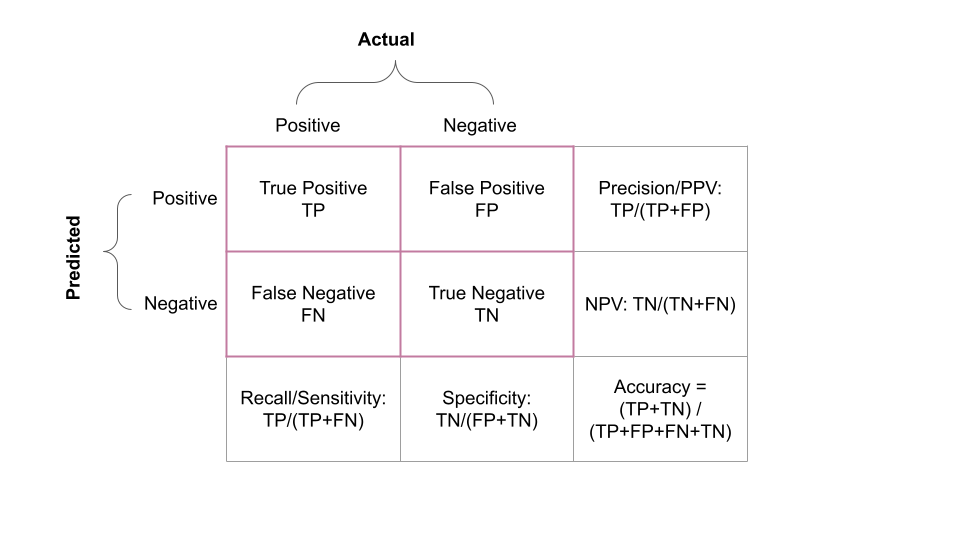

Since we are interested in 'defects', we will asssign it as 'positive class' for the classifier.

Quality Control, our internal customer, wants the metric to identify as many defective ducks as possible

Our best metric for Quality Control here is **recall** i.e how many of defective ducks are actually flagged by defective (positive) by the models

In [33]:
# Model 1

subset = df[df.actual == 'Defect']
subset

,actual,model1,model2,model3
13,Defect,No Defect,Defect,Defect
30,Defect,Defect,No Defect,Defect
65,Defect,Defect,Defect,Defect
70,Defect,Defect,Defect,Defect
74,Defect,No Defect,No Defect,Defect
87,Defect,No Defect,Defect,Defect
118,Defect,No Defect,Defect,No Defect
135,Defect,Defect,No Defect,Defect
140,Defect,No Defect,Defect,Defect
147,Defect,Defect,No Defect,Defect


In [9]:
#Model 1 recall

model_recall = (subset.actual == subset.model1).mean()
print("Model 1")
print(f"Model recall: {model_recall:.2%}")

Model 1
Model recall: 50.00%


In [10]:
# Model 2 recall

model_recall = (subset.actual == subset.model2).mean()
print("Model 2")
print(f"Model recall: {model_recall:.2%}")

Model 2
Model recall: 56.25%


In [11]:
# Model 3 recall

model_recall = (subset.actual == subset.model3).mean()
print("Model 3")
print(f"Model recall: {model_recall:.2%}")

Model 3
Model recall: 81.25%


Takeaways:  
- Quality Control should select a model with higher recall (to avoid false negatives)  
- Quality Control should use **Model 3**

### Exercise 3 (part 2)
- The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii   
- They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. 
- Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

In [12]:
# PR team really wants to minimize the False positives - meaning choose model with highest precision:

# choose subset of model1 where we only select 'positive predictions'
subset = df[df.model1 == 'Defect']

# calculate precision
model_precision = (subset.actual == subset.model1).mean()

print("Model 1")
print(f"Model precision: {model_precision:.2%}")

Model 1
Model precision: 80.00%


In [13]:
# choose subset for model2 where we only select 'positive predictions'
subset = df[df.model2 == 'Defect']

# calculate precision
model_precision = (subset.actual == subset.model2).mean()

print("Model 2")
print(f"Model precision: {model_precision:.2%}")

Model 2
Model precision: 10.00%


In [14]:
# choose subset for model3 where we only select 'positive predictions'
subset = df[df.model3 == 'Defect']

# calculate precision
model_precision = (subset.actual == subset.model3).mean()

print("Model 3")
print(f"Model precision: {model_precision:.2%}")

Model 3
Model precision: 13.13%


Takeaway for Marketing:  
- Use **model 1** since it will minimize the false positive predictions of defects

### Exercise 4. 
You are working as a data scientist for Gives You Paws ™, a subscription based service that shows you cute pictures of dogs or cats (or both for an additional fee).

At Gives You Paws, anyone can upload pictures of their cats or dogs. The photos are then put through a two step process. First an automated algorithm tags pictures as either a cat or a dog (Phase I). Next, the photos that have been initially identified are put through another round of review, possibly with some human oversight, before being presented to the users (Phase II).

Several models have already been developed with the data, and you can find their results here.

Given this dataset, use pandas to create a baseline model (i.e. a model that just predicts the most common class) and answer the following questions:

In terms of accuracy, how do the various models compare to the baseline model? Are any of the models better than the baseline?  
Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recomend for Phase I? For Phase II?  
Suppose you are working on a team that solely deals with cat pictures. Which of these models would you recomend for Phase I? For Phase II?  

In [3]:
# Read the csv file
df = pd.read_csv("https://ds.codeup.com/data/gives_you_paws.csv")
df.head()

,actual,model1,model2,model3,model4
0,cat,cat,dog,cat,dog
1,dog,dog,cat,cat,dog
2,dog,cat,cat,cat,dog
3,dog,dog,dog,cat,dog
4,cat,cat,cat,dog,dog


In [4]:
# look at class distribution
df.actual.value_counts()

dog    3254
cat    1746
Name: actual, dtype: int64

In [5]:
# Create baseline with most frequent label ('dog')
df["baseline"] = df.actual.value_counts().idxmax()
df.head()

,actual,model1,model2,model3,model4,baseline
0,cat,cat,dog,cat,dog,dog
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
4,cat,cat,cat,dog,dog,dog


- In terms of accuracy, how do the various models compare to the baseline model? Are any of the models better than the baseline?

In [6]:
# get column names
models = list(df.columns)
models = models[1:]
models

['model1', 'model2', 'model3', 'model4', 'baseline']

In [7]:
# get accuracy in dictionary form for each model
output = {}
for model in models:
    accuracy = (df.actual == df[model]).mean()
    output.update({model:accuracy})
    
output

{'model1': 0.8074,
 'model2': 0.6304,
 'model3': 0.5096,
 'model4': 0.7426,
 'baseline': 0.6508}

In [8]:
pd.DataFrame(output.items(), columns = ['model', 'accuracy'] )

,model,accuracy
0,model1,0.8074
1,model2,0.6304
2,model3,0.5096
3,model4,0.7426
4,baseline,0.6508


In [ ]:
# Another way to convert dict to dataframe
# pd.DataFrame().append(output,ignore_index = True).T

#### Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recomend for Phase I? For Phase II?

#### Dog Team  
'dog' = positive  
'cat' = negative

**Phase 1: Automated algorithm tags pictures as either a cat or a dog**  
**For phase 1, we should choose a model with highest Recall**


In [21]:
subset = df[df.actual == 'dog']
subset.head()

,actual,model1,model2,model3,model4,baseline
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
5,dog,dog,dog,dog,dog,dog
8,dog,dog,cat,dog,dog,dog


In [22]:
# Model 1 Recall
(subset.actual == subset.model1).mean()

0.803318992009834

In [23]:
# Model 2 Recall
(subset.actual == subset.model2).mean()

0.49078057775046097

In [24]:
# Model 3 Recall
(subset.actual == subset.model3).mean()

0.5086047940995697

In [25]:
# Model 4 Recall
(subset.actual == subset.model4).mean()

0.9557467732022127

**Dog team’s Phase-1 model is Model 4 with Recall of 0.96**

In [26]:
# Confusion Matrix for model 4
pd.crosstab(df.model4, df.actual)

actual,cat,dog
model4,,
cat,603,144
dog,1143,3110


### Phase 2: Photos that have been initially identified are put through another round of review

**Precision is the appropriate metric since we are trying to minimize false positives**

In [27]:
df.head()

,actual,model1,model2,model3,model4,baseline
0,cat,cat,dog,cat,dog,dog
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
4,cat,cat,cat,dog,dog,dog


In [9]:
subset1 = df[df.model1 == 'dog']
subset2 = df[df.model2 == 'dog']
subset3 = df[df.model3 == 'dog']
subset4 = df[df.model4 == 'dog']

In [10]:
# subset1 for model 1
subset1.head()

,actual,model1,model2,model3,model4,baseline
1,dog,dog,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
5,dog,dog,dog,dog,dog,dog
7,cat,dog,cat,cat,dog,dog
8,dog,dog,cat,dog,dog,dog


In [11]:
# Model 1 Precision
(subset1.actual == subset1.model1).mean()

0.8900238338440586

In [12]:
# Model 2 Precision
(subset2.actual == subset2.model2).mean()

0.8931767337807607

In [13]:
# Model 3 Precision
(subset3.actual == subset3.model3).mean()

0.6598883572567783

In [14]:
# Model 4 Precision
(subset4.actual == subset4.model4).mean()

0.7312485304490948

In [15]:
pd.crosstab(df.model2, df.actual)

actual,cat,dog
model2,,
cat,1555,1657
dog,191,1597


**Dog team’s Phase-2 model is Model 2 with Precision of 0.893**

### Cat Team
- positive = 'cat'

In [17]:
from sklearn.metrics import classification_report

In [21]:
x = classification_report(df.actual, df.model1,
                          labels = ['cat', 'dog'],
                          output_dict=True)
pd.DataFrame(x).T

,precision,recall,f1-score,support
cat,0.689772,0.815006,0.747178,1746.0000
dog,0.890024,0.803319,0.844452,3254.0000
accuracy,0.807400,0.807400,0.807400,0.8074
macro avg,0.789898,0.809162,0.795815,5000.0000
weighted avg,0.820096,0.807400,0.810484,5000.0000


In [22]:
print("Model 1")
pd.DataFrame(classification_report(df.actual, df.model1,
                                   labels = ['cat', 'dog'],
                                   output_dict=True)).T

Model 1


,precision,recall,f1-score,support
cat,0.689772,0.815006,0.747178,1746.0000
dog,0.890024,0.803319,0.844452,3254.0000
accuracy,0.807400,0.807400,0.807400,0.8074
macro avg,0.789898,0.809162,0.795815,5000.0000
weighted avg,0.820096,0.807400,0.810484,5000.0000


In [23]:
print("Model 2")
pd.DataFrame(classification_report(df.actual, df.model2,
                                   labels = ['cat', 'dog'],
                                   output_dict=True)).T

Model 2


,precision,recall,f1-score,support
cat,0.484122,0.890607,0.627269,1746.0000
dog,0.893177,0.490781,0.633479,3254.0000
accuracy,0.630400,0.630400,0.630400,0.6304
macro avg,0.688649,0.690694,0.630374,5000.0000
weighted avg,0.750335,0.630400,0.631310,5000.0000


In [26]:
print("Model 3")
pd.DataFrame(classification_report(df.actual, df.model3,
                                   labels = ['cat', 'dog'],
                                   output_dict=True)).T

Model 3


,precision,recall,f1-score,support
cat,0.358347,0.511455,0.421425,1746.0000
dog,0.659888,0.508605,0.574453,3254.0000
accuracy,0.509600,0.509600,0.509600,0.5096
macro avg,0.509118,0.510030,0.497939,5000.0000
weighted avg,0.554590,0.509600,0.521016,5000.0000


In [27]:
print("Model 4")
pd.DataFrame(classification_report(df.actual, df.model4,
                                   labels = ['cat', 'dog'],
                                   output_dict=True)).T

Model 4


,precision,recall,f1-score,support
cat,0.807229,0.345361,0.483755,1746.0000
dog,0.731249,0.955747,0.828560,3254.0000
accuracy,0.742600,0.742600,0.742600,0.7426
macro avg,0.769239,0.650554,0.656157,5000.0000
weighted avg,0.757781,0.742600,0.708154,5000.0000


**Cat team’s Phase-1 model is Model 2 with Recall of 0.89**  
**Cat team’s Phase-2 model is Model 4 with Precision of 0.81**